# **PROJETO 3: COVID 19 MUNDIAL**

Este projeto analisa e implementa um algoritmo de Machine Learning para análise e previsão da evolução do Covid19 no período de 03/01/2020 a 31/12/2020.

Os dados foram retirados em 13/08/2022 da Organização Mundial da Saúde:

https://covid19.who.int/table

# **Análise e Exploração dos Dados**

In [1]:
import numpy as np
import pandas as pd

In [2]:
path = './dados/covid19_mundial.csv'
covid_mundial = pd.read_csv(path, sep=',')
covid_mundial

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
225856,2022-08-08,ZW,Zimbabwe,AFRO,10,256487,0,5584
225857,2022-08-09,ZW,Zimbabwe,AFRO,3,256490,2,5586
225858,2022-08-10,ZW,Zimbabwe,AFRO,2,256492,1,5587
225859,2022-08-11,ZW,Zimbabwe,AFRO,21,256513,0,5587


In [3]:
# Análise dos tipos de variáveis:

covid_mundial.dtypes

Date_reported        object
Country_code         object
Country              object
WHO_region           object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object

In [4]:
covid_mundial['Date_reported'] = pd.to_datetime(covid_mundial['Date_reported'])
covid_mundial.dtypes

Date_reported        datetime64[ns]
Country_code                 object
Country                      object
WHO_region                   object
New_cases                     int64
Cumulative_cases              int64
New_deaths                    int64
Cumulative_deaths             int64
dtype: object

In [5]:
# Filtrando datas:

covid_mundial = covid_mundial.loc[(covid_mundial['Date_reported'] >= '2020-02-26') &
                                  (covid_mundial['Date_reported'] <= '2020-09-04')].reset_index(drop=True)
covid_mundial['Date_reported']

0       2020-02-26
1       2020-02-27
2       2020-02-28
3       2020-02-29
4       2020-03-01
           ...    
45499   2020-08-31
45500   2020-09-01
45501   2020-09-02
45502   2020-09-03
45503   2020-09-04
Name: Date_reported, Length: 45504, dtype: datetime64[ns]

In [6]:
# Número de mortes acumuladas por país:

mortes_total = covid_mundial.groupby('Country').Cumulative_deaths.max()

# .groupby('Country') --> Agrupa por país
# .Cumulative_deaths.max()  --> Retorna o valor máximo das mortes acumuladas

In [7]:
mortes_total.sort_values(ascending=False).head(20)

# ascending=False --> Ordem DECRESCENTE
# ascending=True --> Ordem CRESCENTE

Country
United States of America      191840
Brazil                        123780
Mexico                         85087
Peru                           74677
India                          68472
The United Kingdom             41705
Italy                          35507
Spain                          31270
France                         30539
Iran (Islamic Republic of)     21926
Colombia                       20348
Argentina                      19351
Russian Federation             17649
South Africa                   17049
Chile                          11422
Belgium                        10021
Germany                         9540
Canada                          9097
Indonesia                       7832
Iraq                            7275
Name: Cumulative_deaths, dtype: int64

In [8]:
# Casos acumulados por país:

casos_total = covid_mundial.groupby('Country').Cumulative_cases.max()
casos_total.sort_values(ascending=False).head(20)

Country
United States of America      6174610
Brazil                        3997865
India                         3936747
Russian Federation            1015105
Mexico                         681305
Peru                           663437
Colombia                       633339
South Africa                   633015
Türkiye                        530683
Spain                          519661
Argentina                      509315
Chile                          416501
Iran (Islamic Republic of)     380746
The United Kingdom             346238
France                         323715
Bangladesh                     321615
Saudi Arabia                   318319
Pakistan                       297512
Italy                          272912
Germany                        248919
Name: Cumulative_cases, dtype: int64

In [9]:
covid_brasil = covid_mundial.loc[covid_mundial.Country == 'Brazil']
covid_brasil

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
5376,2020-02-26,BR,Brazil,AMRO,0,0,0,0
5377,2020-02-27,BR,Brazil,AMRO,1,1,0,0
5378,2020-02-28,BR,Brazil,AMRO,0,1,0,0
5379,2020-02-29,BR,Brazil,AMRO,0,1,0,0
5380,2020-03-01,BR,Brazil,AMRO,0,1,0,0
...,...,...,...,...,...,...,...,...
5563,2020-08-31,BR,Brazil,AMRO,41350,3846153,958,120462
5564,2020-09-01,BR,Brazil,AMRO,16158,3862311,366,120828
5565,2020-09-02,BR,Brazil,AMRO,45961,3908272,553,121381
5566,2020-09-03,BR,Brazil,AMRO,42659,3950931,1215,122596


In [10]:
covid_brasil.shape

(192, 8)

In [11]:
# Análise dos valores missing:

covid_brasil.isnull().sum()

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [12]:
covid_mundial.isnull().sum()

Date_reported          0
Country_code         192
Country                0
WHO_region             0
New_cases              0
Cumulative_cases       0
New_deaths             0
Cumulative_deaths      0
dtype: int64

## **Análise de Valores Negativos**

In [13]:
covid_mundial.loc[covid_mundial.New_cases < 0, :]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
20,2020-03-17,AF,Afghanistan,EMRO,-1,24,0,0
1942,2020-03-19,AW,Aruba,AMRO,-4,4,0,0
4247,2020-03-20,BM,Bermuda,AMRO,-4,2,0,0
4439,2020-03-20,BT,Bhutan,SEARO,-1,1,0,0
7313,2020-03-14,KY,Cayman Islands,AMRO,-4,1,0,0
8290,2020-03-31,CO,Colombia,AMRO,-90,702,4,10
9810,2020-03-15,CW,Curaçao,AMRO,-4,1,0,0
9914,2020-06-27,CW,Curaçao,AMRO,-1,23,0,1
11591,2020-05-07,EC,Ecuador,AMRO,-2461,29420,49,1618
11593,2020-05-09,EC,Ecuador,AMRO,-1480,28818,50,1704


In [14]:
# Contagem para cada variável:

covid_mundial.loc[covid_mundial.New_cases < 0, :].count()

Date_reported        40
Country_code         40
Country              40
WHO_region           40
New_cases            40
Cumulative_cases     40
New_deaths           40
Cumulative_deaths    40
dtype: int64

In [15]:
covid_mundial.loc[covid_mundial.New_deaths < 0, :].count()

Date_reported        8
Country_code         8
Country              8
WHO_region           8
New_cases            8
Cumulative_cases     8
New_deaths           8
Cumulative_deaths    8
dtype: int64

In [16]:
covid_brasil.loc[covid_brasil.New_cases < 0, :].count()

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [17]:
covid_brasil.loc[covid_brasil.New_deaths < 0, :].count()

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [18]:
# Criação de um DataFrame com a soma de todos os países por data:

covid_mundial_sum = covid_mundial.groupby('Date_reported').agg({'New_cases': 'sum', 
                                                                'Cumulative_cases': 'sum', 
                                                                'New_deaths': 'sum', 
                                                                'Cumulative_deaths': 'sum'})

# Soma todos os new_cases de cada país na data x e coloca na variável new_cases da nova tabela; o mesmo com as outras variáveis

In [19]:
covid_mundial_sum

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,
2020-02-26,861,81175,62,2913
2020-02-27,1078,82253,42,2955
2020-02-28,1382,83635,63,3018
2020-02-29,1757,85392,66,3084
2020-03-01,1800,87192,47,3131
...,...,...,...,...
2020-08-31,276488,25689141,5835,930397
2020-09-01,229180,25918321,4960,935357
2020-09-02,276881,26195202,5255,940612


## **Análises Estatísticas**

In [20]:
covid_brasil.describe()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,192,192.000000,1.920000e+02,192.000000,192.000000
mean,2020-05-31 12:00:00,20822.213542,1.097198e+06,644.687500,41098.510417
min,2020-02-26 00:00:00,0.000000,0.000000e+00,0.000000,0.000000
25%,2020-04-13 18:00:00,1819.250000,2.180850e+04,114.750000,1198.250000
50%,2020-05-31 12:00:00,17259.000000,4.818030e+05,631.500000,28356.000000
75%,2020-07-18 06:00:00,38775.500000,2.020695e+06,1112.750000,76978.750000
max,2020-09-04 00:00:00,69074.000000,3.997865e+06,1595.000000,123780.000000
std,NaN,19158.072249,1.268925e+06,482.604242,41371.067623


In [21]:
covid_brasil.New_cases.mode()

0    0
Name: New_cases, dtype: int64

In [22]:
covid_brasil.New_deaths.mode()

0    0
Name: New_deaths, dtype: int64

### **Análise dos Outliers**

In [23]:
import seaborn as sns

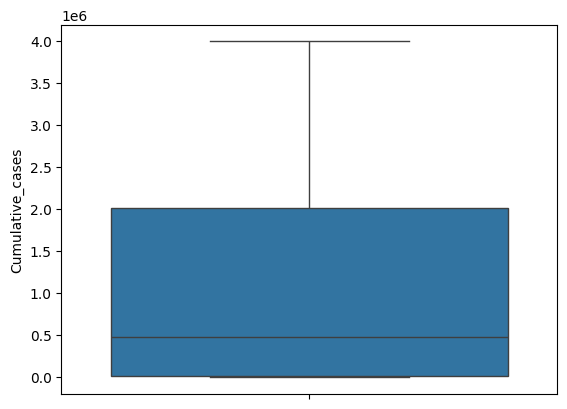

In [24]:
sns.boxplot(covid_brasil, y='Cumulative_cases');

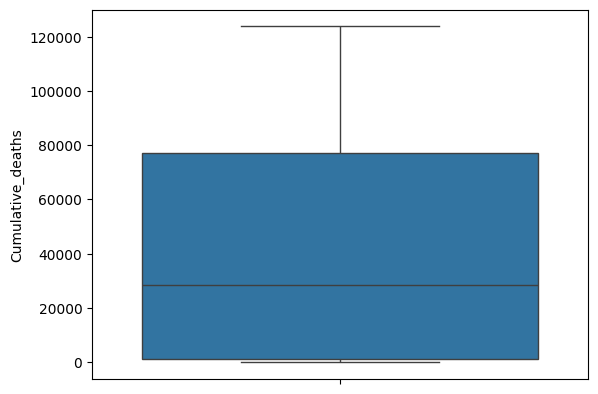

In [25]:
sns.boxplot(covid_brasil, y='Cumulative_deaths');

### **Análise de Normalidade**

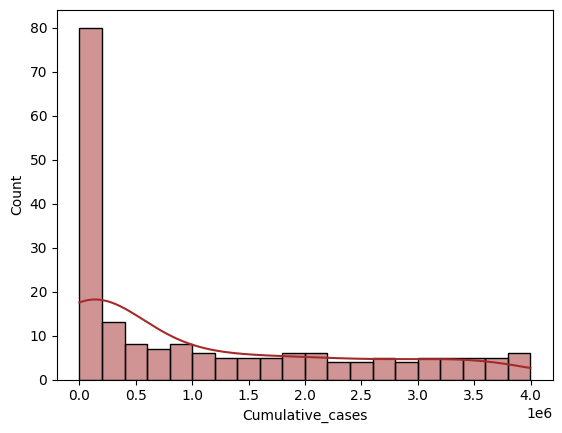

In [26]:
sns.histplot(covid_brasil, x='Cumulative_cases', bins=20, color='brown', kde=True, stat='count',);

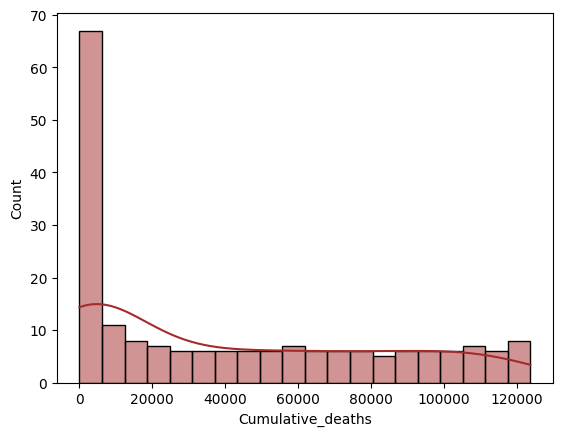

In [27]:
sns.histplot(covid_brasil, x='Cumulative_deaths', bins=20, color='brown', kde=True, stat='count',);

In [28]:
import scipy.stats as stats
import matplotlib.pyplot as plt

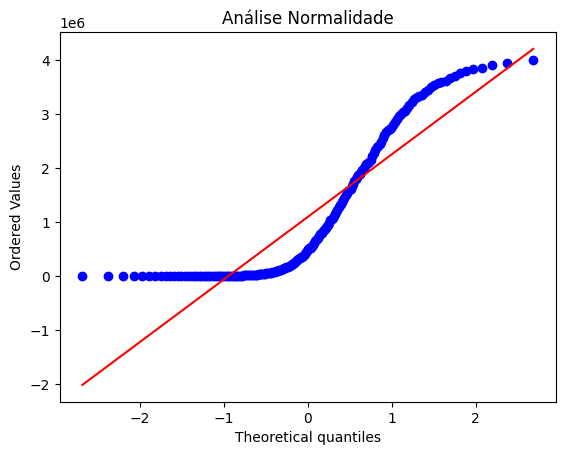

In [29]:
stats.probplot(covid_brasil['Cumulative_cases'], dist='norm', plot=plt)
plt.title('Análise Normalidade')
plt.show()

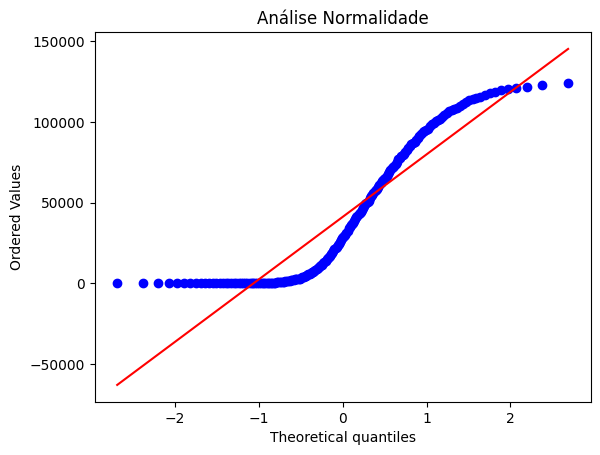

In [30]:
stats.probplot(covid_brasil['Cumulative_deaths'], dist='norm', plot=plt)
plt.title('Análise Normalidade')
plt.show()

In [31]:
estatistica, p = stats.shapiro(covid_brasil.Cumulative_cases)
print(f'Estatística de teste (W) = {round(estatistica, 2)}')
print(f'p_valor = {p}')

Estatística de teste (W) = 0.81
p_valor = 2.0104847081310433e-14


In [32]:
estatistica, p = stats.shapiro(covid_brasil.Cumulative_deaths)
print(f'Estatística de teste (W) = {round(estatistica, 2)}')
print(f'p_valor = {p}')

Estatística de teste (W) = 0.85
p_valor = 1.4818680137140827e-12


### **Gráfico de dispersão em função das datas**

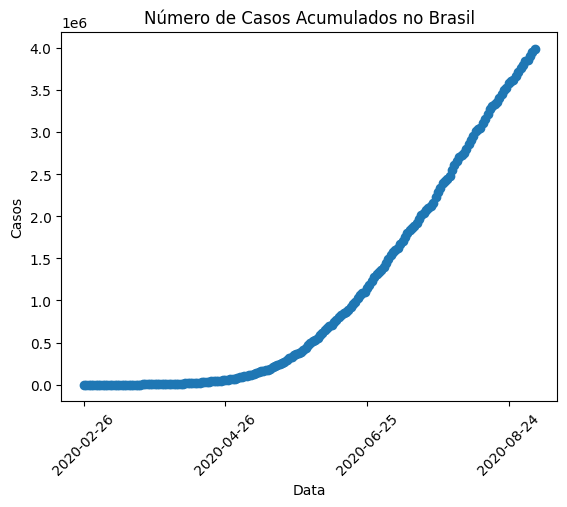

In [33]:
plt.scatter(covid_brasil.Date_reported, covid_brasil.Cumulative_cases)
plt.title('Número de Casos Acumulados no Brasil')
plt.xlabel('Data')
plt.ylabel('Casos')
plt.grid(False)

# Escala do eixo x a cada 60 dias
plt.xticks(covid_brasil.Date_reported[::60], rotation=45)  # A rotação é opcional para melhorar a legibilidade
plt.show()

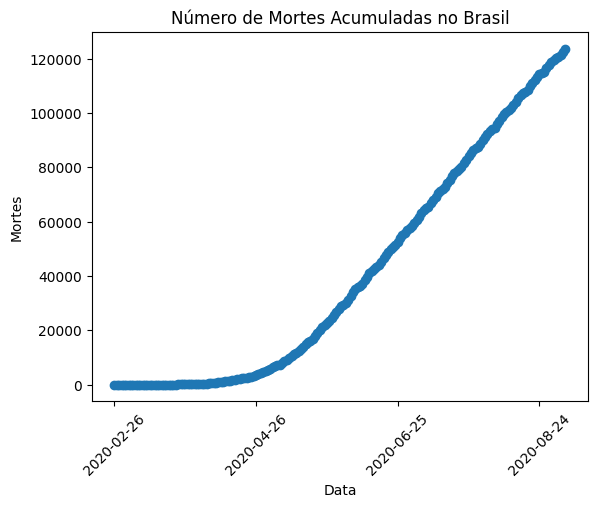

In [34]:
plt.scatter(covid_brasil.Date_reported, covid_brasil.Cumulative_deaths)
plt.title('Número de Mortes Acumuladas no Brasil')
plt.xlabel('Data')
plt.ylabel('Mortes')
plt.grid(False)

plt.xticks(covid_brasil.Date_reported[::60], rotation=45)
plt.show()

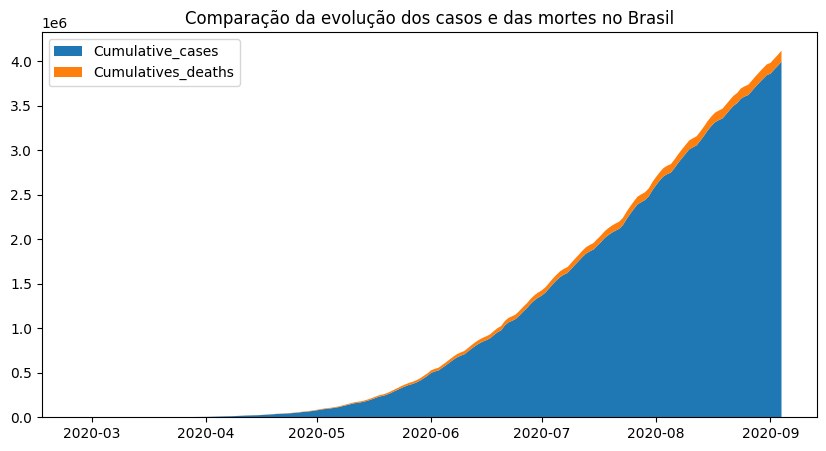

In [35]:
plt.subplots(figsize=(10,5))
plt.stackplot(covid_brasil['Date_reported'], covid_brasil['Cumulative_cases'], covid_brasil['Cumulative_deaths'],
              labels=['Cumulative_cases', 'Cumulatives_deaths'])
plt.legend(loc = 'upper left')  # Adiciona legenda no gráfico na posição especificada
plt.title('Comparação da evolução dos casos e das mortes no Brasil');

### **Correlação Linear**

In [36]:
covid_brasil

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
5376,2020-02-26,BR,Brazil,AMRO,0,0,0,0
5377,2020-02-27,BR,Brazil,AMRO,1,1,0,0
5378,2020-02-28,BR,Brazil,AMRO,0,1,0,0
5379,2020-02-29,BR,Brazil,AMRO,0,1,0,0
5380,2020-03-01,BR,Brazil,AMRO,0,1,0,0
...,...,...,...,...,...,...,...,...
5563,2020-08-31,BR,Brazil,AMRO,41350,3846153,958,120462
5564,2020-09-01,BR,Brazil,AMRO,16158,3862311,366,120828
5565,2020-09-02,BR,Brazil,AMRO,45961,3908272,553,121381
5566,2020-09-03,BR,Brazil,AMRO,42659,3950931,1215,122596


In [37]:
correlacoes = covid_brasil.corr(method='spearman', numeric_only=True)
correlacoes

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
New_cases,1.000000,0.912069,0.916453,0.911384
Cumulative_cases,0.912069,1.000000,0.784992,0.999258
New_deaths,0.916453,0.784992,1.000000,0.785575
Cumulative_deaths,0.911384,0.999258,0.785575,1.000000


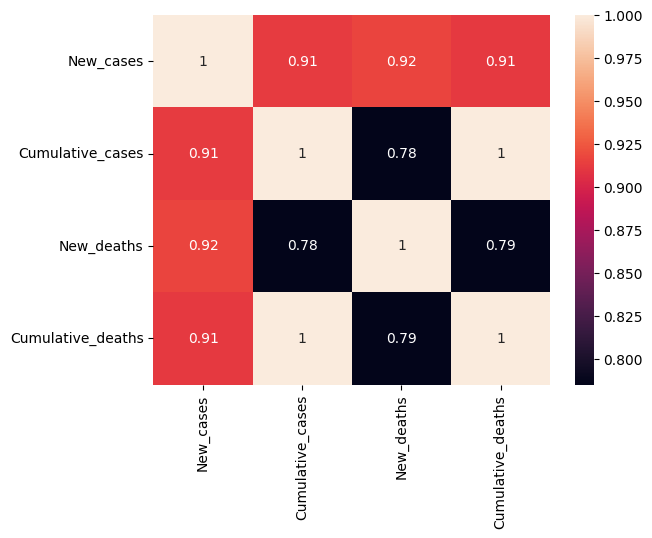

In [38]:
plt.figure()
sns.heatmap(correlacoes, annot=True);

# **Machine Learning**

## **Regressão Linear Simples**

In [39]:
covid_brasil

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
5376,2020-02-26,BR,Brazil,AMRO,0,0,0,0
5377,2020-02-27,BR,Brazil,AMRO,1,1,0,0
5378,2020-02-28,BR,Brazil,AMRO,0,1,0,0
5379,2020-02-29,BR,Brazil,AMRO,0,1,0,0
5380,2020-03-01,BR,Brazil,AMRO,0,1,0,0
...,...,...,...,...,...,...,...,...
5563,2020-08-31,BR,Brazil,AMRO,41350,3846153,958,120462
5564,2020-09-01,BR,Brazil,AMRO,16158,3862311,366,120828
5565,2020-09-02,BR,Brazil,AMRO,45961,3908272,553,121381
5566,2020-09-03,BR,Brazil,AMRO,42659,3950931,1215,122596


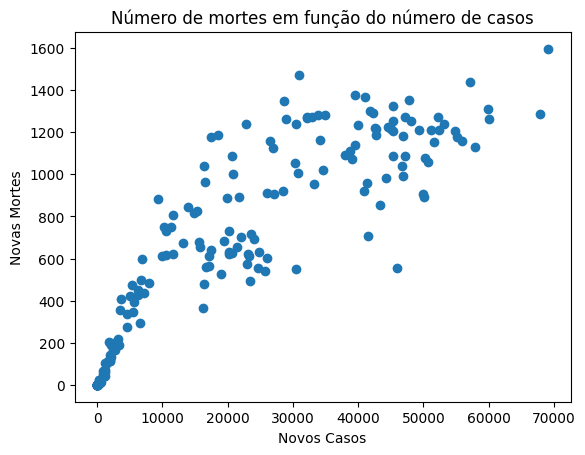

In [40]:
plt.scatter(covid_brasil.New_cases, covid_brasil.New_deaths)
plt.title('Número de mortes em função do número de casos')
plt.xlabel('Novos Casos')
plt.ylabel('Novas Mortes')
plt.grid(False)

In [41]:
# variavel_x_y = nome_tabela.iloc[:, indice_coluna].values

x = covid_brasil.iloc[:, 4].values  # Novos casos  (índice 4)
y = covid_brasil.iloc[:, 6].values  # Novas mortes (índice 6)

In [42]:
x

array([    0,     1,     0,     0,     0,     1,     0,     0,     0,
           1,     5,     5,     6,     6,     0,     9,    26,    17,
           7,    37,    79,    34,    57,   137,     0,   476,     0,
         642,   345,   310,   232,   482,   502,   486,   353,   323,
        1138,  1119,  1074,  1146,  1222,   852,   926,  1661,  2210,
        1930,  1781,  1089,  1442,  1261,  1832,  3058,  2105,  3257,
        2917,  2055,  1927,  2498,  2678,  3735,  3503,  5514,  3379,
        4613,  5385,  6276,  7218,  6209,  4970,  4588,  6633,  6935,
       10503,  9888, 10222, 10611,  6760,  5632,  9258, 11385, 13944,
       15305, 14919,  7938, 13140, 17408, 19951, 18508, 20803, 16508,
       15813, 11687, 16324, 20599, 26417, 26928, 33274, 16409, 11598,
       28936, 28633, 30925, 30830, 27075, 18912, 15654, 32091, 32913,
       30412, 25982, 21704, 17110, 20647, 34918, 32188, 22765, 54771,
       34666, 17459, 21432, 39436, 42725, 39483, 46860, 38693, 30476,
       24052, 33846,

In [43]:
y

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          1,    3,    0,    7,    0,   14,    9,   12,   11,   20,   15,
         22,   22,   23,   42,   40,   58,   60,   73,   54,   67,  114,
        133,  141,  115,   68,   99,  105,  204,  204,  188,  217,  206,
        115,  113,  166,  165,  407,  357,  346,  189,  338,  474,  449,
        435,  428,  421,  275,  296,  600,  615,  610,  751,  730,  496,
        396,  881,  749,  844,  824,  816,  485,  674, 1179,  888, 1188,
       1001,  965,  653,  807, 1039, 1086, 1156, 1124,  956,  480,  623,
       1262, 1349, 1473, 1005,  904,  525,  679, 1272, 1274, 1239,  909,
        892,  612,  627, 1282, 1269, 1238, 1206, 1022,  641,  654, 1374,
       1185, 1141,  990, 1109,  552,  692, 1280, 1038, 1252, 1290, 1091,
        602,  620, 1254, 1223, 1220, 1214, 1071,  631,  733, 1300, 1233,
       1322, 1163,  921,  716,  632, 1367, 1284, 13

In [44]:
# Transoformar em matriz:
x = x.reshape(-1, 1)
x

array([[    0],
       [    1],
       [    0],
       [    0],
       [    0],
       [    1],
       [    0],
       [    0],
       [    0],
       [    1],
       [    5],
       [    5],
       [    6],
       [    6],
       [    0],
       [    9],
       [   26],
       [   17],
       [    7],
       [   37],
       [   79],
       [   34],
       [   57],
       [  137],
       [    0],
       [  476],
       [    0],
       [  642],
       [  345],
       [  310],
       [  232],
       [  482],
       [  502],
       [  486],
       [  353],
       [  323],
       [ 1138],
       [ 1119],
       [ 1074],
       [ 1146],
       [ 1222],
       [  852],
       [  926],
       [ 1661],
       [ 2210],
       [ 1930],
       [ 1781],
       [ 1089],
       [ 1442],
       [ 1261],
       [ 1832],
       [ 3058],
       [ 2105],
       [ 3257],
       [ 2917],
       [ 2055],
       [ 1927],
       [ 2498],
       [ 2678],
       [ 3735],
       [ 3503],
       [ 5514],
       [

### **Separando base de dados em teste e treinamento**

In [45]:
from sklearn.model_selection import train_test_split

# x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(variavel_x, variavel_y, 
#                                                                  test_size = tamanho_teste,
#                                                                  random_state = semente_aleatória)

# Sem o random_state, o resultado não se repetirá

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.25,  # 25% para teste e 75% para treinamento
                                                    random_state = 42)

In [46]:
x_train

array([[10611],
       [24052],
       [  310],
       [69074],
       [ 1927],
       [ 3058],
       [57152],
       [ 1074],
       [  482],
       [40816],
       [    6],
       [  852],
       [45392],
       [45961],
       [47161],
       [16409],
       [    0],
       [46860],
       [17408],
       [26928],
       [    0],
       [ 1781],
       [28633],
       [20599],
       [46712],
       [ 1138],
       [50032],
       [   57],
       [47134],
       [34666],
       [33846],
       [    5],
       [21432],
       [51147],
       [    0],
       [  642],
       [18912],
       [    0],
       [  502],
       [38693],
       [39023],
       [39483],
       [45048],
       [    5],
       [ 3379],
       [33274],
       [24831],
       [    0],
       [50644],
       [23529],
       [ 6633],
       [41350],
       [ 5385],
       [ 2210],
       [39436],
       [  345],
       [ 1222],
       [41008],
       [19373],
       [  476],
       [  137],
       [34177],
       [

In [47]:
x_train.size

144

In [48]:
x_test

array([[ 1930],
       [42619],
       [ 6760],
       [45403],
       [34918],
       [49298],
       [    9],
       [    7],
       [   26],
       [    1],
       [ 9258],
       [20647],
       [ 7218],
       [ 6276],
       [24578],
       [  232],
       [28532],
       [ 4588],
       [17110],
       [ 4970],
       [60091],
       [23284],
       [17459],
       [11598],
       [ 6209],
       [22765],
       [    0],
       [52383],
       [ 3503],
       [41857],
       [32188],
       [49970],
       [   37],
       [15813],
       [55155],
       [    1],
       [20229],
       [39924],
       [50230],
       [14919],
       [25982],
       [51603],
       [  323],
       [44571],
       [  926],
       [17078],
       [30925],
       [ 2055]], dtype=int64)

In [49]:
x_test.size

48

In [50]:
y_train

array([ 730,  692,   12, 1595,  113,  204, 1437,   58,   20,  921,    0,
         54, 1088,  553, 1085,  480,    0,  990, 1179, 1124,    0,  115,
       1349, 1086, 1038,   42,  892,    1, 1271, 1022, 1280,    0,  654,
       1211,    0,   14,  525,    0,   15, 1109, 1071, 1141, 1214,    0,
        189,  956,  631,    0, 1060,  716,  296,  958,  474,  133, 1374,
          9,   73, 1367,  684,    7,    3, 1163,  733,  824, 1239,  749,
        674,   60,  552,  888,  396,  855,  561,   68, 1156,  632, 1215,
        346,  610,   22,  114,  602,    0,  679,  217,  709, 1311, 1204,
        105,  844,   22,    0,  892,  807,  485, 1274,  620,  965,    0,
          0,  407, 1237, 1091,    0,  615,  703, 1254,  572, 1352,  338,
        206, 1274,  204,  366,  165,   99, 1001,    0,  166,  541,  984,
       1252,   40, 1129,  494,    0,  188, 1284, 1290, 1156,  904, 1262,
       1206, 1188,  751, 1185, 1184,    0,  600, 1272,    0, 1039, 1054,
       1005], dtype=int64)

In [51]:
y_train.size

144

In [52]:
y_test

array([ 141, 1220,  496, 1322, 1282, 1212,    0,    0,    0,    0,  881,
        627,  435,  449,  555,   11,  921,  275,  612,  421, 1262,  614,
        641,  623,  428, 1238,    0, 1212,  357, 1300, 1269,  905,    0,
        653, 1175,    0,  620, 1233, 1079,  816,  909, 1154,   23, 1223,
         67,  565, 1473,  115], dtype=int64)

In [53]:
y_test.size

48

### **Criação do modelo de regressão linear**

In [54]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)
score = regressor.score(x_train, y_train)

# Score --> Coeficiente de determinação

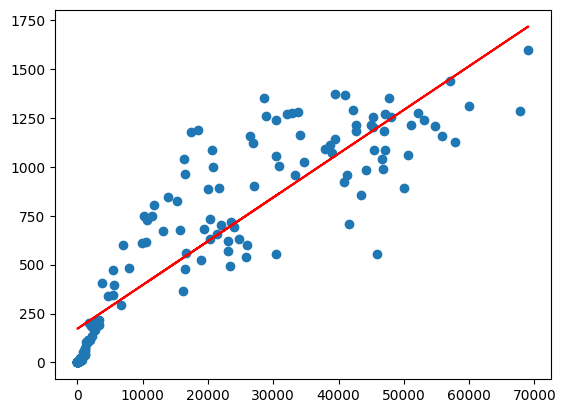

In [55]:
# Gráfico com dados de treinamento:

plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train), color='red');

In [56]:
score

0.7866150884506931

In [57]:
previsoes = regressor.predict(x_test)

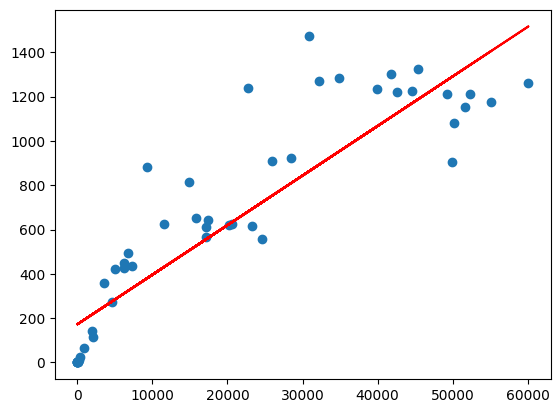

In [58]:
# Gráfico com os dados de teste:

plt.scatter(x_test, y_test)
plt.plot(x_test, regressor.predict(x_test), color='red');

In [59]:
previsao = regressor.predict(np.array(80000).reshape(-1,1))
previsao

# Tendo 80000 casos, a previsão é ter 1756 mortes.

array([1961.27882714])

In [60]:
# Coeficiente linear:

regressor.intercept_

172.4340104568322

In [61]:
# Coeficiente angular:

regressor.coef_

array([0.02236056])

#### **Equação:**

mortes = 0.022 * casos + 172.434

#### **Métricas de Desempenho**

In [62]:
# Coeficiente de Determinação (R^2):

regressor.score(x_test, y_test)

0.7897657846590623

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'Erro Médio Absoluto (MAE): {mean_absolute_error(y_test, previsoes)}')
print(f'Erro Quadrático Médio (MSE): {mean_squared_error(y_test, previsoes)}')
print(f'Raiz do Erro Quadrático Médio (RMSE): {np.sqrt(mean_squared_error(y_test, previsoes))}')

# Quanto menores os resultados, melhor o algoritmo

Erro Médio Absoluto (MAE): 174.43190679815734
Erro Quadrático Médio (MSE): 47194.550102446054
Raiz do Erro Quadrático Médio (RMSE): 217.24306686853336


### **Regressão Polinomial**

In [64]:
covid_brasil

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
5376,2020-02-26,BR,Brazil,AMRO,0,0,0,0
5377,2020-02-27,BR,Brazil,AMRO,1,1,0,0
5378,2020-02-28,BR,Brazil,AMRO,0,1,0,0
5379,2020-02-29,BR,Brazil,AMRO,0,1,0,0
5380,2020-03-01,BR,Brazil,AMRO,0,1,0,0
...,...,...,...,...,...,...,...,...
5563,2020-08-31,BR,Brazil,AMRO,41350,3846153,958,120462
5564,2020-09-01,BR,Brazil,AMRO,16158,3862311,366,120828
5565,2020-09-02,BR,Brazil,AMRO,45961,3908272,553,121381
5566,2020-09-03,BR,Brazil,AMRO,42659,3950931,1215,122596


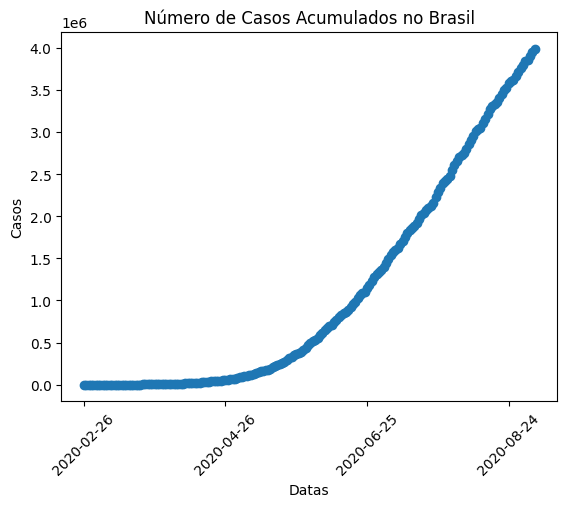

In [65]:
plt.scatter(covid_brasil.Date_reported, covid_brasil.Cumulative_cases)
plt.title('Número de Casos Acumulados no Brasil')
plt.xlabel('Datas')
plt.ylabel('Casos')
plt.grid(False)

plt.xticks(covid_brasil.Date_reported[::60], rotation=45)
plt.show()

In [66]:
x = covid_brasil.iloc[:, 0].values  #     Datas        (índice 0)
y = covid_brasil.iloc[:, 5].values  # Casos Acumulados (índice 5)

In [67]:
x

array(['2020-02-26T00:00:00.000000000', '2020-02-27T00:00:00.000000000',
       '2020-02-28T00:00:00.000000000', '2020-02-29T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000', '2020-03-02T00:00:00.000000000',
       '2020-03-03T00:00:00.000000000', '2020-03-04T00:00:00.000000000',
       '2020-03-05T00:00:00.000000000', '2020-03-06T00:00:00.000000000',
       '2020-03-07T00:00:00.000000000', '2020-03-08T00:00:00.000000000',
       '2020-03-09T00:00:00.000000000', '2020-03-10T00:00:00.000000000',
       '2020-03-11T00:00:00.000000000', '2020-03-12T00:00:00.000000000',
       '2020-03-13T00:00:00.000000000', '2020-03-14T00:00:00.000000000',
       '2020-03-15T00:00:00.000000000', '2020-03-16T00:00:00.000000000',
       '2020-03-17T00:00:00.000000000', '2020-03-18T00:00:00.000000000',
       '2020-03-19T00:00:00.000000000', '2020-03-20T00:00:00.000000000',
       '2020-03-21T00:00:00.000000000', '2020-03-22T00:00:00.000000000',
       '2020-03-23T00:00:00.000000000', '2020-03-24

In [68]:
# Transformar as datas em sequência numérica (1,2,3,4,...) e em matriz:

x = np.arange(1, len(x) + 1).reshape(-1,1)
x

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      

In [69]:
y

array([      0,       1,       1,       1,       1,       2,       2,
             2,       2,       3,       8,      13,      19,      25,
            25,      34,      60,      77,      84,     121,     200,
           234,     291,     428,     428,     904,     904,    1546,
          1891,    2201,    2433,    2915,    3417,    3903,    4256,
          4579,    5717,    6836,    7910,    9056,   10278,   11130,
         12056,   13717,   15927,   17857,   19638,   20727,   22169,
         23430,   25262,   28320,   30425,   33682,   36599,   38654,
         40581,   43079,   45757,   49492,   52995,   58509,   61888,
         66501,   71886,   78162,   85380,   91589,   96559,  101147,
        107780,  114715,  125218,  135106,  145328,  155939,  162699,
        168331,  177589,  188974,  202918,  218223,  233142,  241080,
        254220,  271628,  291579,  310087,  330890,  347398,  363211,
        374898,  391222,  411821,  438238,  465166,  498440,  514849,
        526447,  555

**Separando base de dados em teste e treinamento**

In [70]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state = 42)

In [71]:
x_train.size

144

In [72]:
x_test.size

48

In [73]:
y_train.size

144

In [74]:
y_test.size

48

In [75]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)  # De grau 2
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [76]:
regressor = LinearRegression()
regressor.fit(x_train_poly, y_train)
score = regressor.score(x_train_poly, y_train)

In [77]:
y_train.size

144

In [78]:
previsoes = regressor.predict(x_test_poly)

In [79]:
previsoes.size

48

In [80]:
# Criação de uma sequência para previsão:

forecast = np.arange(len(x) + 20).reshape(-1,1)  # + 20 é uma previsão de 20 dias a mais

In [81]:
forecast.shape

(212, 1)

In [82]:
x_train_total = poly.transform(forecast)
x_train_total.shape

(212, 3)

In [83]:
x_train_total

array([[1.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 1.0000e+00, 1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00],
       [1.0000e+00, 3.0000e+00, 9.0000e+00],
       [1.0000e+00, 4.0000e+00, 1.6000e+01],
       [1.0000e+00, 5.0000e+00, 2.5000e+01],
       [1.0000e+00, 6.0000e+00, 3.6000e+01],
       [1.0000e+00, 7.0000e+00, 4.9000e+01],
       [1.0000e+00, 8.0000e+00, 6.4000e+01],
       [1.0000e+00, 9.0000e+00, 8.1000e+01],
       [1.0000e+00, 1.0000e+01, 1.0000e+02],
       [1.0000e+00, 1.1000e+01, 1.2100e+02],
       [1.0000e+00, 1.2000e+01, 1.4400e+02],
       [1.0000e+00, 1.3000e+01, 1.6900e+02],
       [1.0000e+00, 1.4000e+01, 1.9600e+02],
       [1.0000e+00, 1.5000e+01, 2.2500e+02],
       [1.0000e+00, 1.6000e+01, 2.5600e+02],
       [1.0000e+00, 1.7000e+01, 2.8900e+02],
       [1.0000e+00, 1.8000e+01, 3.2400e+02],
       [1.0000e+00, 1.9000e+01, 3.6100e+02],
       [1.0000e+00, 2.0000e+01, 4.0000e+02],
       [1.0000e+00, 2.1000e+01, 4.4100e+02],
       [1.

In [84]:
previsao_total = regressor.predict(x_train_total)
len(previsao_total)

212

In [85]:
previsao_total

array([ 1.46856484e+05,  1.34626539e+05,  1.22742963e+05,  1.11205756e+05,
        1.00014919e+05,  8.91704521e+04,  7.86723545e+04,  6.85206264e+04,
        5.87152680e+04,  4.92562791e+04,  4.01436598e+04,  3.13774101e+04,
        2.29575301e+04,  1.48840196e+04,  7.15687865e+03, -2.23892665e+02,
       -7.25829439e+03, -1.39463265e+04, -2.02879891e+04, -2.62832820e+04,
       -3.19322054e+04, -3.72347591e+04, -4.21909433e+04, -4.68007579e+04,
       -5.10642029e+04, -5.49812783e+04, -5.85519841e+04, -6.17763203e+04,
       -6.46542870e+04, -6.71858840e+04, -6.93711115e+04, -7.12099693e+04,
       -7.27024576e+04, -7.38485763e+04, -7.46483253e+04, -7.51017048e+04,
       -7.52087147e+04, -7.49693550e+04, -7.43836258e+04, -7.34515269e+04,
       -7.21730584e+04, -7.05482204e+04, -6.85770127e+04, -6.62594355e+04,
       -6.35954886e+04, -6.05851722e+04, -5.72284862e+04, -5.35254306e+04,
       -4.94760054e+04, -4.50802106e+04, -4.03380462e+04, -3.52495123e+04,
       -2.98146087e+04, -

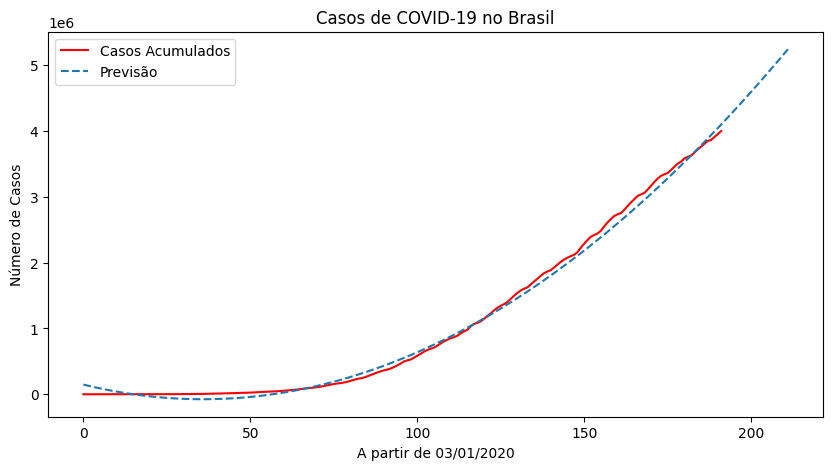

In [86]:
plt.subplots(figsize=(10,5))
plt.plot(forecast[:-20], y, color='red')
plt.plot(forecast, previsao_total, linestyle='dashed')
plt.title('Casos de COVID-19 no Brasil')
plt.xlabel('A partir de 03/01/2020')
plt.ylabel('Número de Casos')
plt.legend(['Casos Acumulados', 'Previsão']);

#### **Métricas de Desempenho**

In [87]:
# Coeficiente de Determinação (R^2)

score

0.9972592722790166

In [88]:
poly_teste_pred = regressor.predict(x_test_poly)

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'Erro Médio Absoluto (MAE): {mean_absolute_error(poly_teste_pred, y_test)}')
print(f'Erro Quadrático Médio (MSE): {mean_squared_error(poly_teste_pred, y_test)}')
print(f'Raiz do Erro Quadrático Médio (RMSE): {np.sqrt(mean_squared_error(poly_teste_pred, y_test))}')

Erro Médio Absoluto (MAE): 55345.64849186848
Erro Quadrático Médio (MSE): 3765553025.47529
Raiz do Erro Quadrático Médio (RMSE): 61364.10209133097
